<a href="https://colab.research.google.com/github/Ashlin-V-Thomas/Dynamical-systems/blob/main/Phase_portrait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

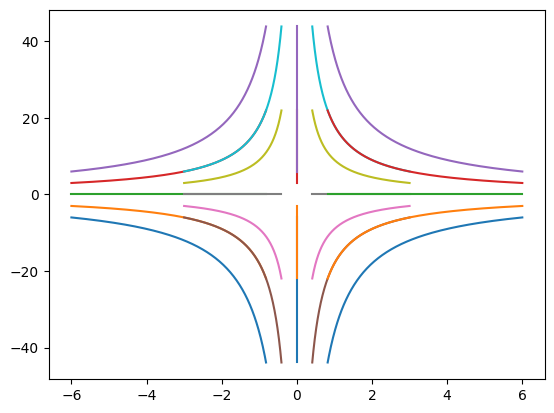

In [1]:
import matplotlib.pyplot as plt
import math

def add_tuple(tuple1,tuple2):
    #The function takes two vectors in R^2 and returns their sum.
    return (tuple1[0]+tuple2[0],tuple1[1]+tuple2[1])

def add_n_tuple(list_tuple):
    #This function takes n  vectors in R^2 and returns their sum.
    temp1 = 0
    temp2 = 0
    for i in list_tuple:
        temp1 += i[0]
        temp2 += i[1]
    return (temp1,temp2)


def scalar_multiply(intuple,c):
    #This function takes a vector in R^2 and a scalar and returns the scalar multiple of that vector.
    return (intuple[0]*c,intuple[1]*c)

def g(intuple):
    # g is a function, g: R^2 --> R^2
    x = intuple[0]
    y = intuple [1]
    return (-x,y)

def runge_kutta_solve(f,initial_condition,final_time):
    #f is a function defined from R^2 -> R^2.
    #initial = ((x(t_0),y(t_0)),t_0)
    #If X(t) is the solution of the system satisfying the initial condition then the function outputs X(final_t).
    out = initial_condition[0]
    t=initial_condition[1]
    #finds a sufficiently small time interval so that approximation holds true..
    delta_t= (final_time - t)/10**2
    while t+delta_t<final_time:
        #We use the runge-kutta method in the following steps.
        k1 = scalar_multiply(f(out),delta_t)
        k2 = scalar_multiply(f(add_tuple(out , scalar_multiply(k1,0.5))),delta_t)
        k3 = scalar_multiply(f(add_tuple(out , scalar_multiply(k2,0.5))),delta_t)
        k4 = scalar_multiply(f(add_tuple(out , k3)),delta_t)
        out = add_tuple(out , scalar_multiply(add_n_tuple([k1 , scalar_multiply(k2,2) , scalar_multiply(k3,2) , k4]),1/6))
        t+= delta_t
    delta_t = final_time - t
    k1 = scalar_multiply(f(out),delta_t)
    k2 = scalar_multiply(f(add_tuple(out , scalar_multiply(k1,0.5))),delta_t)
    k3 = scalar_multiply(f(add_tuple(out , scalar_multiply(k2,0.5))),delta_t)
    k4 = scalar_multiply(f(add_tuple(out , k3)),delta_t)
    out = add_tuple(out , scalar_multiply(add_n_tuple([k1 , scalar_multiply(k2,2) , scalar_multiply(k3,2) , k4]),1/6))
    return out



def graph_trajectory(f,initial_condition,final_time):
    # The function graphs the trajectory in the phase plane.
    t= initial_condition[1]
    X = []
    Y = []
    while t<=final_time:
        temp = runge_kutta_solve(f,initial_condition,t)
        X.append(temp[0])
        Y.append(temp[1])
        t+=0.01
    return [X,Y]

def graph_phase_portrait(f):
    initials = []
    for i in range(-6,7,3):
        for j in range(-6,7,3):
            initials.append((i,j))
    for i in initials:
        out = graph_trajectory(f,(i,0),2)
        plt.plot(out[0],out[1])
    plt.show()

graph_phase_portrait(g)